# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load our dataset

In [59]:
df=pd.read_csv('Car_Purchasing_Data.csv')
df.head()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,USA,0,42,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,USA,0,41,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,USA,1,43,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,USA,1,58,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,USA,1,57,59729.15130,5358.712177,560304.0671,55915.46248


In [48]:
i=df[df['Customer Name']=='Hammett A. Manning']
type(i)

pandas.core.frame.DataFrame

# EDA

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer Name        500 non-null    object 
 1   Customer e-mail      500 non-null    object 
 2   Country              500 non-null    object 
 3   Gender               500 non-null    int64  
 4   Age                  500 non-null    int64  
 5   Annual Salary        500 non-null    float64
 6   Credit Card Debt     500 non-null    float64
 7   Net Worth            500 non-null    float64
 8   Car Purchase Amount  500 non-null    float64
dtypes: float64(4), int64(2), object(3)
memory usage: 35.3+ KB


In [66]:
#df.drop('Customer Name',axis=1,inplace=True)
#df.drop('Country',axis=1,inplace=True)
df.drop('Customer e-mail',axis=1,inplace=True)

In [4]:
df.describe()

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.224000,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.990339,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,41.000000,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.000000,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,52.000000,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


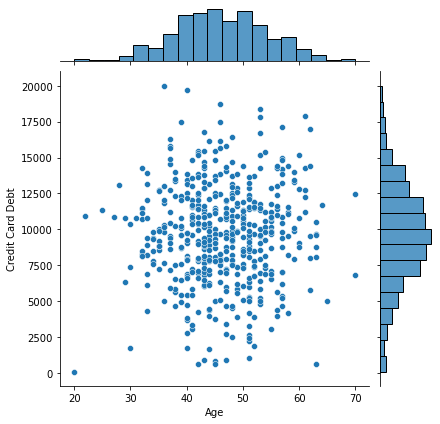

In [5]:
sns.jointplot(x='Age',y='Credit Card Debt',data=df)

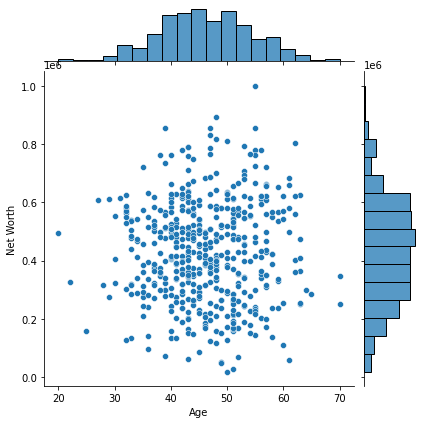

In [6]:
sns.jointplot(x='Age',y='Net Worth',data=df)

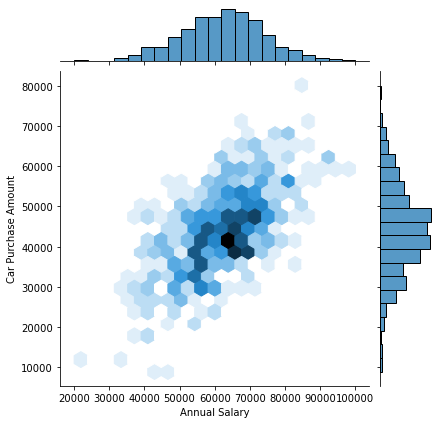

In [8]:
sns.jointplot(data=df,x='Annual Salary',y='Car Purchase Amount',kind='hex')

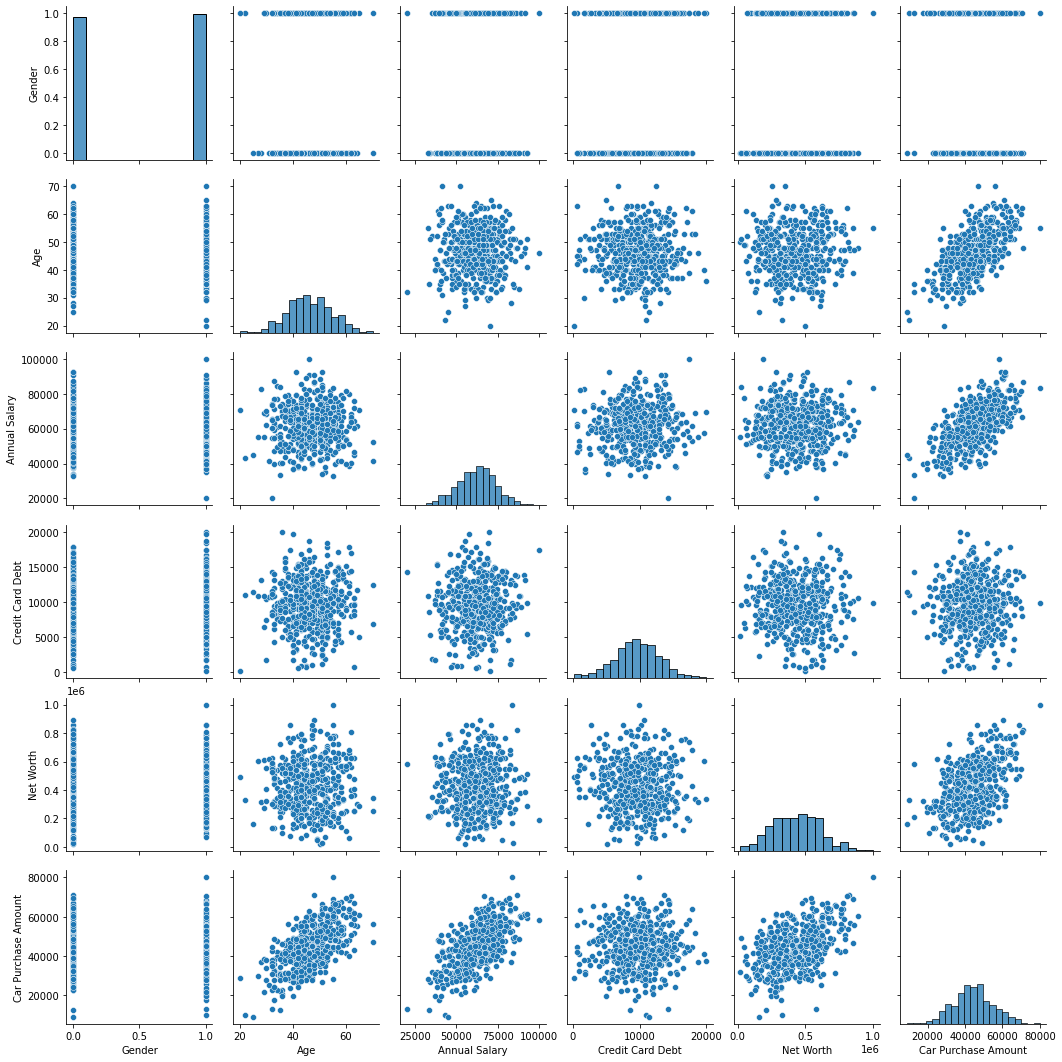

In [9]:
sns.pairplot(df)

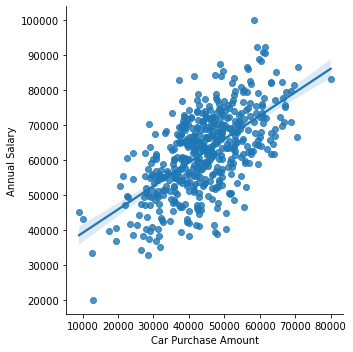

In [10]:
sns.lmplot(x='Car Purchase Amount',y='Annual Salary',data=df)

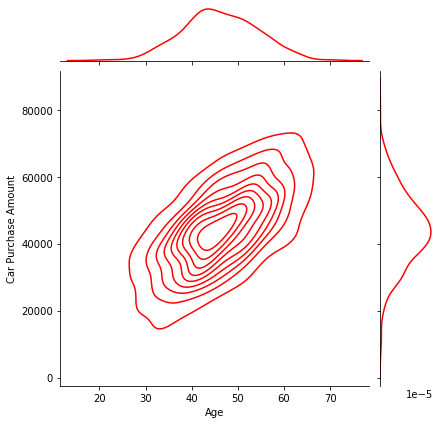

In [11]:
sns.jointplot(x='Age',y='Car Purchase Amount',data=df,kind='kde',color='red')

<AxesSubplot:xlabel='Age', ylabel='Count'>

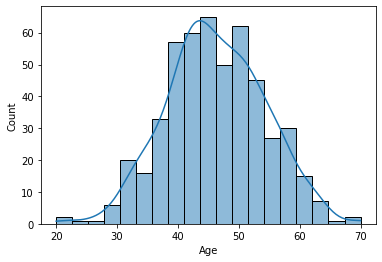

In [12]:
sns.histplot(df,x='Age',kde=True)

<AxesSubplot:xlabel='Annual Salary', ylabel='Count'>

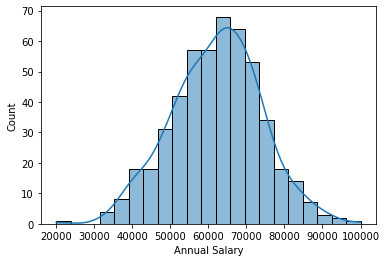

In [14]:
sns.histplot(df,x='Annual Salary',kde=True)

<AxesSubplot:>

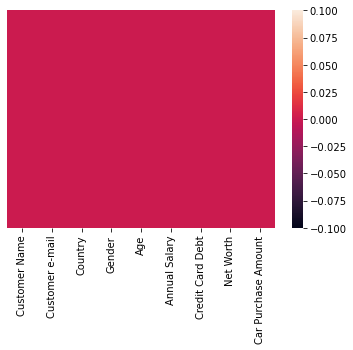

In [16]:
sns.heatmap(df.isnull(),cbar=True,yticklabels=False)

# Linear Regression

In [67]:
df.columns

Index(['Gender', 'Age', 'Annual Salary', 'Credit Card Debt', 'Net Worth',
       'Car Purchase Amount'],
      dtype='object')

In [75]:
x=df.drop('Car Purchase Amount',axis=1)
y=df['Car Purchase Amount']

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

# Training the model

In [78]:
from sklearn.linear_model import LinearRegression

In [79]:
lm=LinearRegression()

In [80]:
lm.fit(x_train,y_train)

LinearRegression()

In [81]:
lm.coef_

array([3.33737983e+01, 8.40914384e+02, 5.61746342e-01, 4.05947073e-03,
       2.88762864e-02])

# Predicting the test data

In [84]:
predictions=lm.predict(x_test)

Text(0, 0.5, 'Predicted Values')

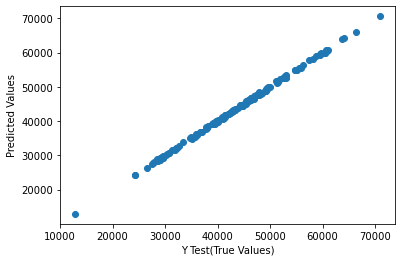

In [88]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test(True Values)')
plt.ylabel('Predicted Values')

# Evaluating the Model

In [102]:
from sklearn import metrics

In [103]:
metrics.mean_absolute_error(y_test,predictions)

211.94466044343187

In [104]:
metrics.mean_squared_error(y_test,predictions)

61331.29285217074

In [105]:
np.sqrt(metrics.mean_squared_error(y_test,predictions))

247.65155531950683

In [106]:
metrics.explained_variance_score(y_test,predictions)

0.9993764839484415

# Residuals

C:\Users\kevin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Residuals')

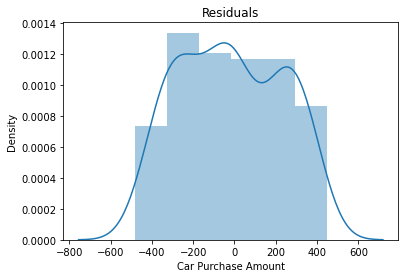

In [100]:
sns.distplot((y_test-predictions))
plt.title("Residuals")

# Conclusion

In [107]:
cdf=pd.DataFrame(lm.coef_,x.columns,columns=['Coeff'])

In [108]:
cdf

,Coeff
Gender,33.373798
Age,840.914384
Annual Salary,0.561746
Credit Card Debt,0.004059
Net Worth,0.028876


In [ ]:
## Company should focus on older population.